In [4]:
%matplotlib inline

In [1]:
import psycopg2
import geopandas as gpd
import pandas as pd
import numpy as np
import json

host = "localhost"
port = 5432
database = "harbin"
user     = "osmuser"
password = "pass"

con = psycopg2.connect(
    host=host, port=port, database=database, user=user, password=password)
con.set_client_encoding("UTF8")

In [2]:
bfmap_ways = gpd.read_postgis("select gid, osm_id, source, target, reverse, priority, geom from bfmap_ways;", con)
ways = pd.read_sql_query("select id as osm_id, tags, nodes from ways;", con)

con.close()

In [3]:
roads = bfmap_ways.merge(ways, on='osm_id')

## visualizing map

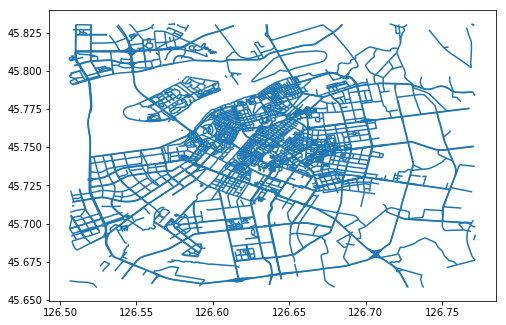

In [25]:
bfmap_ways.plot(figsize=(8, 8))

## visualizing route

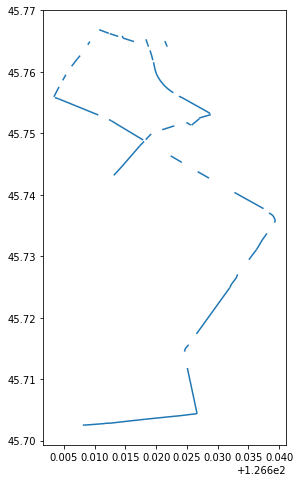

In [23]:
path = np.loadtxt("/tmp/road.txt")

road = roads[roads.gid.isin(path)]
road.plot(figsize=(8, 8))

## visualizing gps on map

In [12]:
from bokeh.plotting import figure, output_notebook, show
import numpy as np
import datashader
from bokeh.tile_providers import STAMEN_TERRAIN, STAMEN_TONER_BACKGROUND
from bokeh.models import (
    Range1d, WMTSTileSource, ColumnDataSource, HoverTool
)
output_notebook()

def plot_gps(gps, line_width=2):
    plot_width  = int(600)
    plot_height = int(plot_width//1.2)
    #x_range, y_range = ((126.506130,126.771862), (45.657920,45.830905))
    x, y = datashader.utils.lnglat_to_meters(gps[:,0], gps[:, 1])
    x_range = Range1d(start=x.min()-100, end=x.max()+100, bounds=None)
    y_range = Range1d(start=y.min()-100, end=y.max()+100, bounds=None)
    p = figure(tools='wheel_zoom,pan,reset,hover,save',# x_range=x_range, y_range=y_range,
               plot_width=plot_width, plot_height=plot_height)

    p.line(x=x, y=y, line_width=line_width)
    p.circle(x=x, y=y, size=5, fill_color="#F46B42", line_color=None, line_width=1.5)
    p.add_tile(STAMEN_TERRAIN)
    return p

Loading BokehJS ...

In [22]:
gps = np.loadtxt("/tmp/gps.txt")
p = plot_gps(gps, 3)
show(p)